In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/store_sku_ba_dataset.csv')

In [3]:
df.head()

,Store ID,SKU ID,Total Visits,Transactions,Revenue
0,Store_1,SKU_1,606,573,74688.67
1,Store_1,SKU_2,695,27,1390.60
2,Store_1,SKU_3,389,285,50679.63
3,Store_1,SKU_4,689,505,16764.34
4,Store_1,SKU_5,522,230,41928.40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store ID      1000 non-null   object 
 1   SKU ID        1000 non-null   object 
 2   Total Visits  1000 non-null   int64  
 3   Transactions  1000 non-null   int64  
 4   Revenue       1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [5]:
df.isnull().sum()

,0
Store ID,0
SKU ID,0
Total Visits,0
Transactions,0
Revenue,0


In [6]:
df.describe(include="all")

,Store ID,SKU ID,Total Visits,Transactions,Revenue
count,1000,1000,1000.000000,1000.000000,1000.00000
unique,50,20,NaN,NaN,NaN
top,Store_1,SKU_1,NaN,NaN,NaN
freq,20,50,NaN,NaN,NaN
mean,NaN,NaN,526.054000,264.865000,27883.25593
std,NaN,NaN,275.404057,222.826489,30143.18769
min,NaN,NaN,50.000000,0.000000,0.00000
25%,NaN,NaN,294.250000,80.000000,6115.60000
50%,NaN,NaN,530.000000,209.500000,16683.21000
75%,NaN,NaN,758.000000,396.250000,39546.38250


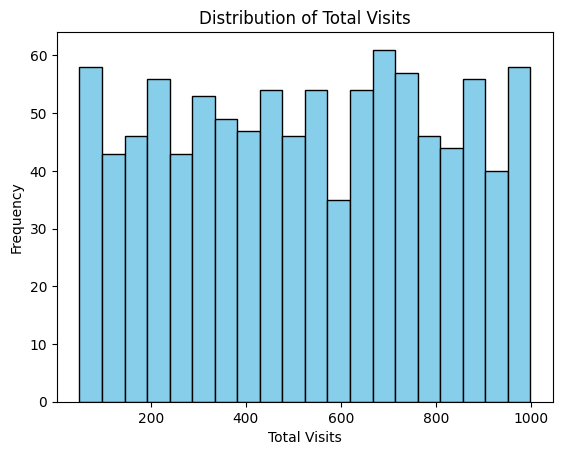

In [7]:
plt.hist(df['Total Visits'], bins=20, color='skyblue', edgecolor='black') #Visualizing distribution of total number of visits
plt.xlabel('Total Visits')
plt.ylabel('Frequency')
plt.title('Distribution of Total Visits')
plt.show()

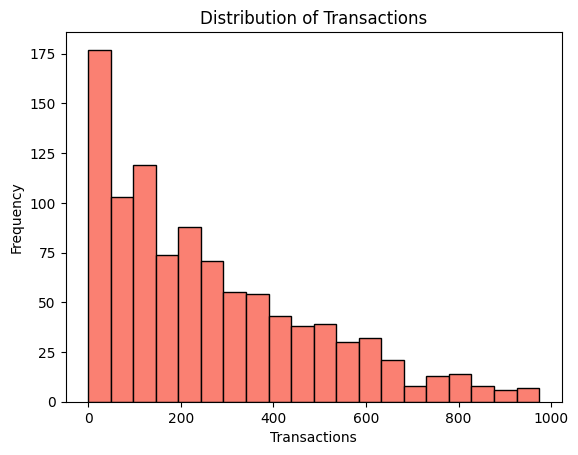

In [8]:
plt.hist(df['Transactions'], bins=20, color='salmon', edgecolor='black') #visualizing distribution of Transactions column
plt.xlabel('Transactions')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions')
plt.show()

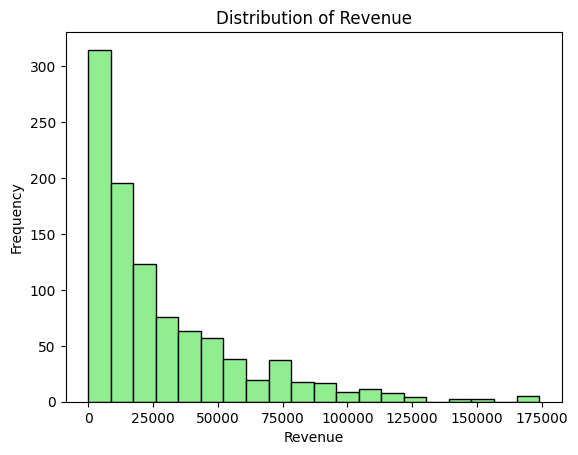

In [9]:
plt.hist(df['Revenue'], bins=20, color='lightgreen', edgecolor='black')  #visualizing distribution of Revenue column
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.show()

In [14]:
df['Conversion Rate'] = df['Transactions'] / df['Total Visits']

In [15]:
# Store-level conversion rate
store_summary = df.groupby('Store ID').agg({
    'Total Visits': 'sum',
    'Transactions': 'sum',
    'Revenue': 'sum'
}).reset_index()
store_summary['Conversion Rate'] = store_summary['Transactions'] / store_summary['Total Visits']

In [17]:
# SKU-level conversion rate
sku_summary = df.groupby('SKU ID').agg({
    'Total Visits': 'sum',
    'Transactions': 'sum',
    'Revenue': 'sum'
}).reset_index()
sku_summary['Conversion Rate'] = sku_summary['Transactions'] / sku_summary['Total Visits']

In [55]:
df.head()

,Store ID,SKU ID,Total Visits,Transactions,Revenue,Conversion Rate
0,Store_1,SKU_1,606,573,74688.67,0.945545
1,Store_1,SKU_2,695,27,1390.60,0.038849
2,Store_1,SKU_3,389,285,50679.63,0.732648
3,Store_1,SKU_4,689,505,16764.34,0.732946
4,Store_1,SKU_5,522,230,41928.40,0.440613


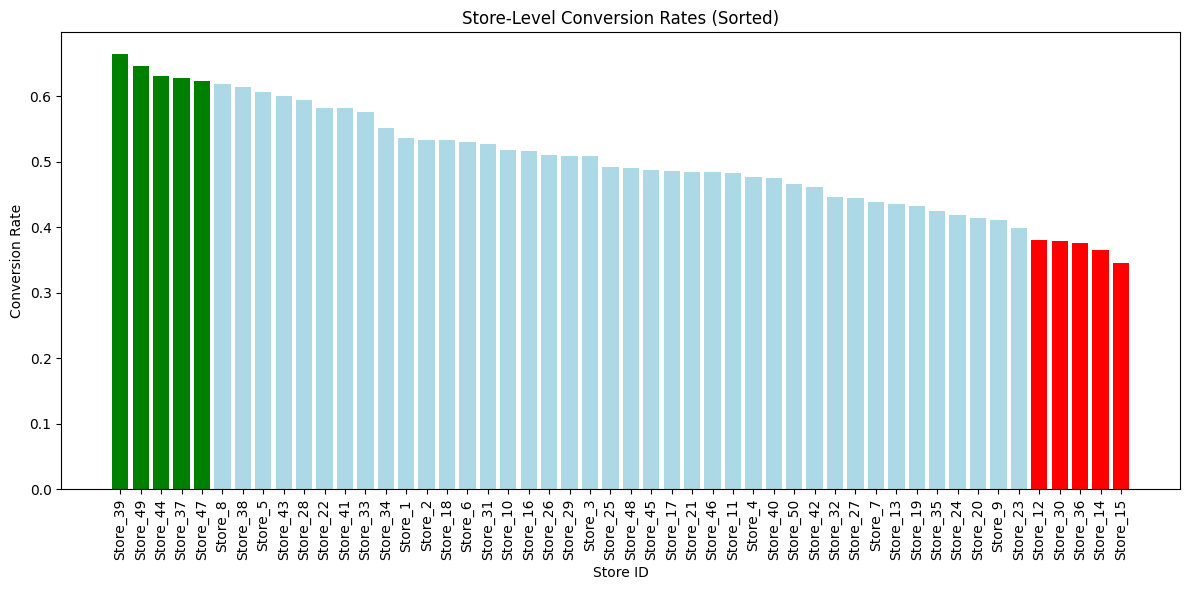

In [43]:
# Sorting the store_summary DataFrame by 'Conversion Rate' in descending order
store_summary_sorted = store_summary.sort_values('Conversion Rate', ascending=False)

# To get the top 5 and bottom 5 stores
top_5_stores = store_summary_sorted.head(5)
bottom_5_stores = store_summary_sorted.tail(5)

plt.figure(figsize=(12, 6))
plt.bar(store_summary_sorted['Store ID'], store_summary_sorted['Conversion Rate'], color='lightblue')

plt.bar(top_5_stores['Store ID'], top_5_stores['Conversion Rate'], color='green')

plt.bar(bottom_5_stores['Store ID'], bottom_5_stores['Conversion Rate'], color='red')

plt.xlabel('Store ID')
plt.ylabel('Conversion Rate')
plt.title('Store-Level Conversion Rates (Sorted)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

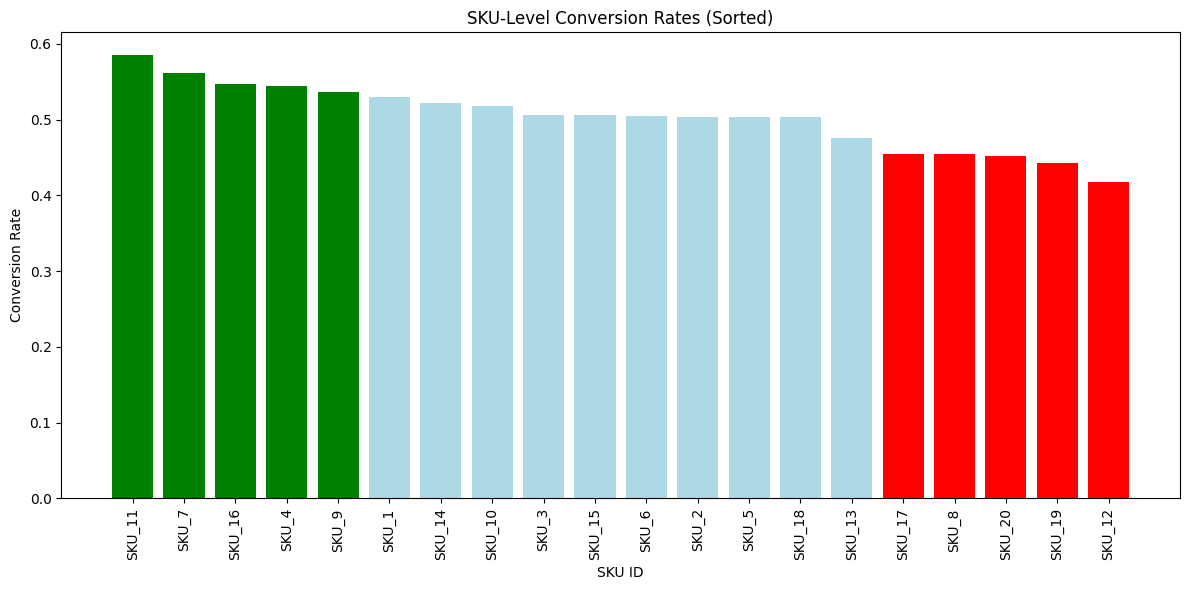

In [42]:
# Get the top 5 and bottom 5 SKUs
sku_summary_sorted = sku_summary.sort_values('Conversion Rate', ascending=False)
top_5_skus = sku_summary_sorted.head(5)
bottom_5_skus = sku_summary_sorted.tail(5)


plt.figure(figsize=(12, 6))

plt.bar(sku_summary_sorted['SKU ID'], sku_summary_sorted['Conversion Rate'], color='lightblue')

plt.bar(top_5_skus['SKU ID'], top_5_skus['Conversion Rate'], color='green')

plt.bar(bottom_5_skus['SKU ID'], bottom_5_skus['Conversion Rate'], color='red')

plt.xlabel('SKU ID')
plt.ylabel('Conversion Rate')
plt.title('SKU-Level Conversion Rates (Sorted)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
# Trend 1: Stores with high visits but low conversion rates
store_summary['Visit_Conversion_Ratio'] = store_summary['Total Visits'] / store_summary['Conversion Rate']
high_visit_low_conversion = store_summary[store_summary['Visit_Conversion_Ratio'] > store_summary['Visit_Conversion_Ratio'].quantile(0.75)]
high_visit_low_conversion = high_visit_low_conversion[['Store ID', 'Total Visits', 'Conversion Rate']]

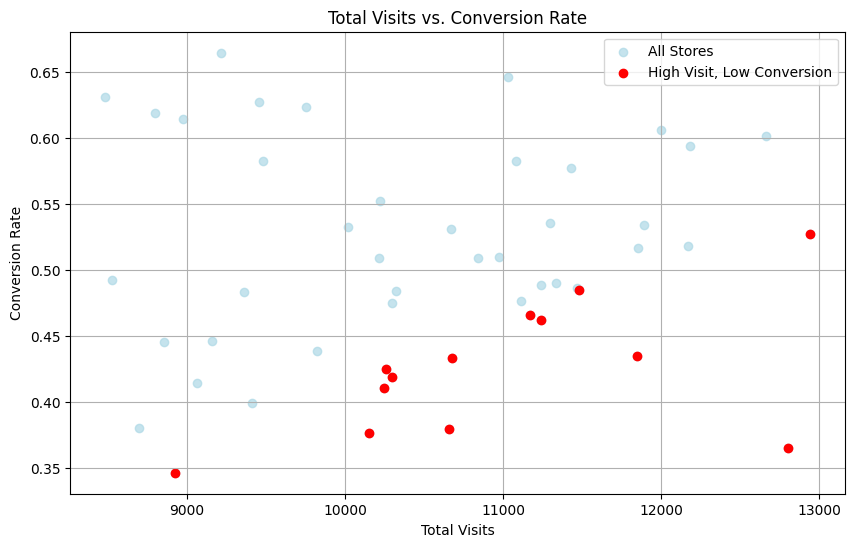

In [46]:
# Scatter plot of Total Visits vs. Conversion Rate for all stores
plt.figure(figsize=(10, 6))
plt.scatter(store_summary['Total Visits'], store_summary['Conversion Rate'], color='lightblue', alpha=0.7, label='All Stores')

plt.scatter(high_visit_low_conversion['Total Visits'], high_visit_low_conversion['Conversion Rate'], color='red', label='High Visit, Low Conversion')

plt.xlabel('Total Visits')
plt.ylabel('Conversion Rate')
plt.title('Total Visits vs. Conversion Rate')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Trend 2: SKUs with high revenue but low conversion rates
sku_summary['Revenue_Conversion_Ratio'] = sku_summary['Revenue'] / sku_summary['Conversion Rate']
high_revenue_low_conversion = sku_summary[sku_summary['Revenue_Conversion_Ratio'] > sku_summary['Revenue_Conversion_Ratio'].quantile(0.75)]
high_revenue_low_conversion = high_revenue_low_conversion[['SKU ID', 'Revenue', 'Conversion Rate']]

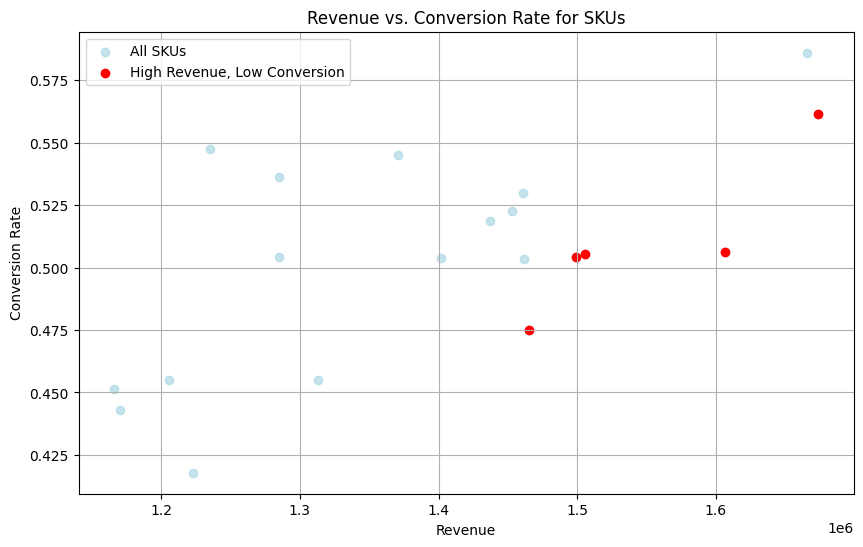

In [48]:
# Scatter plot of Revenue vs. Conversion Rate for all SKUs
plt.figure(figsize=(10, 6))
plt.scatter(sku_summary['Revenue'], sku_summary['Conversion Rate'], color='lightblue', alpha=0.7, label='All SKUs')

plt.scatter(high_revenue_low_conversion['Revenue'], high_revenue_low_conversion['Conversion Rate'], color='red', label='High Revenue, Low Conversion')

plt.xlabel('Revenue')
plt.ylabel('Conversion Rate')
plt.title('Revenue vs. Conversion Rate for SKUs')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Trend 3: Variation in SKU_1 performance across stores
sku_1_data = df[df['SKU ID'] == 'SKU_1'][['Store ID', 'Conversion Rate', 'Total Visits', 'Transactions']]
sku_1_variation = pd.concat([sku_1_data.nlargest(5, 'Conversion Rate'), sku_1_data.nsmallest(5, 'Conversion Rate')])

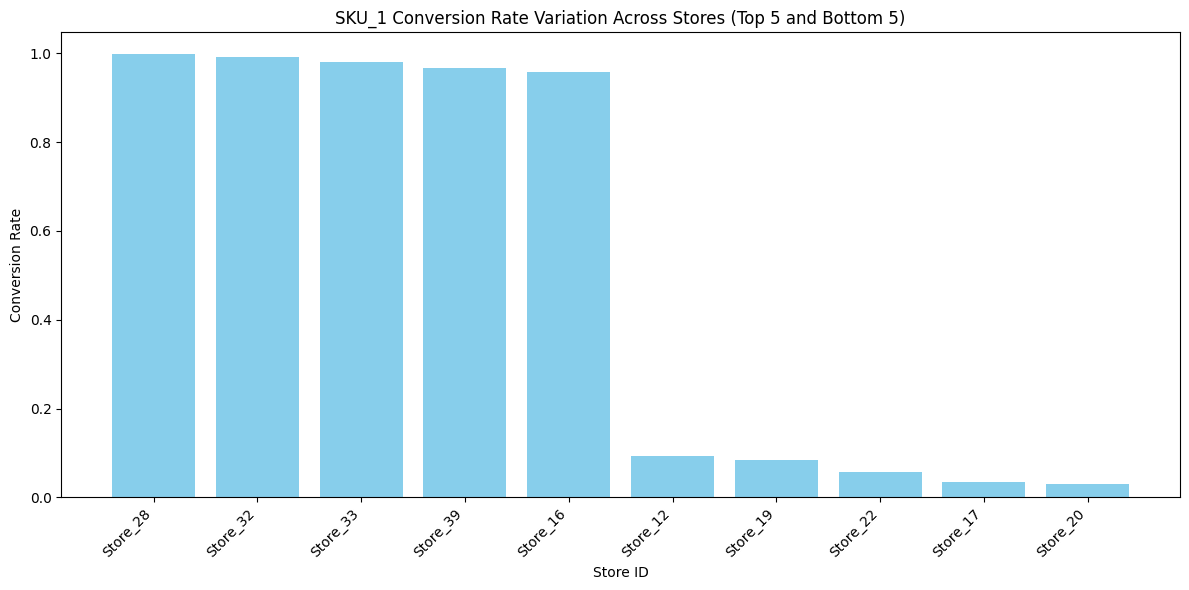

In [52]:
sku_1_variation_sorted = sku_1_variation.sort_values('Conversion Rate', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sku_1_variation_sorted['Store ID'], sku_1_variation_sorted['Conversion Rate'], color='skyblue')
plt.xlabel('Store ID')
plt.ylabel('Conversion Rate')
plt.title('SKU_1 Conversion Rate Variation Across Stores (Top 5 and Bottom 5)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
markdown_content = f"""
# Key Trends in Store and SKU Performance

## Trend 1: Stores with High Visits but Low Conversion Rates
Some stores attract significant foot traffic but fail to convert visitors into buyers, indicating potential issues such as pricing, product availability, or in-store experience.

**Examples**:
{high_visit_low_conversion.to_markdown(index=False)}

- **Observation**: Stores like {high_visit_low_conversion.iloc[0]['Store ID']} have high visits ({int(high_visit_low_conversion.iloc[0]['Total Visits']):,}) but conversion rates as low as {high_visit_low_conversion.iloc[0]['Conversion Rate']:.2%}, suggesting untapped sales potential.
- **Implication**: These stores could benefit from improved product displays, staff training, or targeted promotions.

## Trend 2: SKUs with High Revenue but Low Conversion Rates
Certain SKUs generate substantial revenue despite low conversion rates, likely due to high pricing or niche appeal.

**Examples**:
{high_revenue_low_conversion.to_markdown(index=False)}

- **Observation**: SKUs like {high_revenue_low_conversion.iloc[0]['SKU ID']} generate ${high_revenue_low_conversion.iloc[0]['Revenue']:,.2f} in revenue but have a conversion rate of only {high_revenue_low_conversion.iloc[0]['Conversion Rate']:.2%}.
- **Implication**: These SKUs may be premium products. Consider bundling or discounts to boost conversion rates while maintaining revenue.

## Trend 3: Significant Variation in SKU_1 Performance Across Stores
SKU_1 shows considerable variation in conversion rates across stores, indicating store-specific factors like location or customer demographics.

**Examples**:
{sku_1_variation[['Store ID', 'Conversion Rate', 'Total Visits', 'Transactions']].to_markdown(index=False)}

- **Observation**: SKU_1 has conversion rates ranging from {sku_1_data['Conversion Rate'].min():.2%} in {sku_1_data.nsmallest(1, 'Conversion Rate')['Store ID'].iloc[0]} to {sku_1_data['Conversion Rate'].max():.2%} in {sku_1_data.nlargest(1, 'Conversion Rate')['Store ID'].iloc[0]}.
- **Implication**: High-performing stores could share best practices (e.g., marketing, placement) with low-performing ones to improve consistency.

## Recommendations
1. **Optimize Underperforming Stores**:
   - For stores like {bottom_5_stores['Store ID'].iloc[0]}, investigate barriers to purchase (e.g., stock availability, staff training, or pricing). Implement targeted promotions to boost conversions.
2. **Enhance Low-Performing SKUs**:
   - For SKUs like {bottom_5_skus['SKU ID'].iloc[0]}, consider price adjustments, improved product descriptions, or bundling with high-performing SKUs to increase appeal.
3. **Leverage High-Performing SKUs**:
   - Scale successful SKUs like {top_5_skus['SKU ID'].iloc[0]} by increasing inventory in high-performing stores and replicating marketing strategies in underperforming stores.
4. **Address High-Visit, Low-Conversion Stores**:
   - For stores like {high_visit_low_conversion['Store ID'].iloc[0]}, conduct customer feedback surveys to identify pain points (e.g., long checkout times, product visibility) and optimize the shopping experience.

## Reasoning
- **Data-Driven Insights**: The analysis highlights specific stores and SKUs with actionable metrics (e.g., conversion rates, revenue). For example, low conversion rates in high-visit stores suggest operational or experiential issues.
- **Targeted Interventions**: Recommendations focus on addressing root causes (e.g., pricing for low-conversion SKUs, operational improvements for stores) to maximize impact.
- **Scalability**: Leveraging high-performing SKUs and stores ensures efficient resource allocation, driving overall sales growth.
"""

In [63]:
from IPython.display import display, Markdown

display(Markdown(markdown_content))


# Key Trends in Store and SKU Performance

## Trend 1: Stores with High Visits but Low Conversion Rates
Some stores attract significant foot traffic but fail to convert visitors into buyers, indicating potential issues such as pricing, product availability, or in-store experience.

**Examples**:
| Store ID   |   Total Visits |   Conversion Rate |
|:-----------|---------------:|------------------:|
| Store_13   |          11846 |          0.435168 |
| Store_14   |          12804 |          0.365042 |
| Store_15   |           8922 |          0.346335 |
| Store_19   |          10678 |          0.433321 |
| Store_21   |          11478 |          0.484579 |
| Store_24   |          10295 |          0.418941 |
| Store_30   |          10659 |          0.379304 |
| Store_31   |          12942 |          0.52743  |
| Store_35   |          10257 |          0.424978 |
| Store_36   |          10149 |          0.376293 |
| Store_42   |          11239 |          0.462319 |
| Store_50   |          11172 |          0.465718 |
| Store_9    |          10245 |          0.410737 |

- **Observation**: Stores like Store_13 have high visits (11,846) but conversion rates as low as 43.52%, suggesting untapped sales potential.
- **Implication**: These stores could benefit from improved product displays, staff training, or targeted promotions.

## Trend 2: SKUs with High Revenue but Low Conversion Rates
Certain SKUs generate substantial revenue despite low conversion rates, likely due to high pricing or niche appeal.

**Examples**:
| SKU ID   |     Revenue |   Conversion Rate |
|:---------|------------:|------------------:|
| SKU_13   | 1.46517e+06 |          0.475163 |
| SKU_15   | 1.50567e+06 |          0.505578 |
| SKU_2    | 1.49893e+06 |          0.504142 |
| SKU_3    | 1.60643e+06 |          0.506085 |
| SKU_7    | 1.67402e+06 |          0.561391 |

- **Observation**: SKUs like SKU_13 generate $1,465,168.53 in revenue but have a conversion rate of only 47.52%.
- **Implication**: These SKUs may be premium products. Consider bundling or discounts to boost conversion rates while maintaining revenue.

## Trend 3: Significant Variation in SKU_1 Performance Across Stores
SKU_1 shows considerable variation in conversion rates across stores, indicating store-specific factors like location or customer demographics.

**Examples**:
| Store ID   |   Conversion Rate |   Total Visits |   Transactions |
|:-----------|------------------:|---------------:|---------------:|
| Store_28   |         0.997275  |            734 |            732 |
| Store_32   |         0.991128  |            789 |            782 |
| Store_33   |         0.979701  |            936 |            917 |
| Store_39   |         0.966834  |            995 |            962 |
| Store_16   |         0.958738  |            412 |            395 |
| Store_20   |         0.0289855 |            345 |             10 |
| Store_17   |         0.0336606 |            713 |             24 |
| Store_22   |         0.0578387 |            657 |             38 |
| Store_19   |         0.0851689 |            681 |             58 |
| Store_12   |         0.0924262 |            779 |             72 |

- **Observation**: SKU_1 has conversion rates ranging from 2.90% in Store_20 to 99.73% in Store_28.
- **Implication**: High-performing stores could share best practices (e.g., marketing, placement) with low-performing ones to improve consistency.

## Recommendations
1. **Optimize Underperforming Stores**:
   - For stores like Store_12, investigate barriers to purchase (e.g., stock availability, staff training, or pricing). Implement targeted promotions to boost conversions.
2. **Enhance Low-Performing SKUs**:
   - For SKUs like SKU_17, consider price adjustments, improved product descriptions, or bundling with high-performing SKUs to increase appeal.
3. **Leverage High-Performing SKUs**:
   - Scale successful SKUs like SKU_11 by increasing inventory in high-performing stores and replicating marketing strategies in underperforming stores.
4. **Address High-Visit, Low-Conversion Stores**:
   - For stores like Store_13, conduct customer feedback surveys to identify pain points (e.g., long checkout times, product visibility) and optimize the shopping experience.

## Reasoning
- **Data-Driven Insights**: The analysis highlights specific stores and SKUs with actionable metrics (e.g., conversion rates, revenue). For example, low conversion rates in high-visit stores suggest operational or experiential issues.
- **Targeted Interventions**: Recommendations focus on addressing root causes (e.g., pricing for low-conversion SKUs, operational improvements for stores) to maximize impact.
- **Scalability**: Leveraging high-performing SKUs and stores ensures efficient resource allocation, driving overall sales growth.
